data.isna().sum() - ПРОВЕРКА НА NAN

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/user_data.csv')
logs = pd.read_csv('/content/logs.csv')

In [ ]:
data.shape

(2954, 3)

In [ ]:
data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [ ]:
logs.shape

(4500, 4)

In [ ]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [ ]:
data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [ ]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [ ]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [ ]:
data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [ ]:
data.describe()


,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [ ]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [ ]:
success_num=logs.query('success == True')\
.groupby('client', as_index = False)\
.agg({'success':'count'})\
.sort_values('success', ascending = False)
success_num

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [ ]:
success_num.query('success == 41')

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [ ]:
logs.query('success == True')\
.groupby('platform')\
.agg({'success':'count'})

,success
platform,
computer,1090
phone,2019
tablet,180


In [ ]:
data


,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [ ]:
data.premium.value_counts()

False    2548
True      406
Name: premium, dtype: int64

In [74]:
new_data = data.merge(logs)
new_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [75]:
dataprem = new_data.query('premium == True')\
    .groupby('age',as_index = False)\
    .agg({'premium':'count'})
dataprem

,age,premium
0,20,9
1,21,8
2,22,7
3,23,7
4,24,5
5,25,17
6,26,9
7,27,11
8,28,6
9,29,11


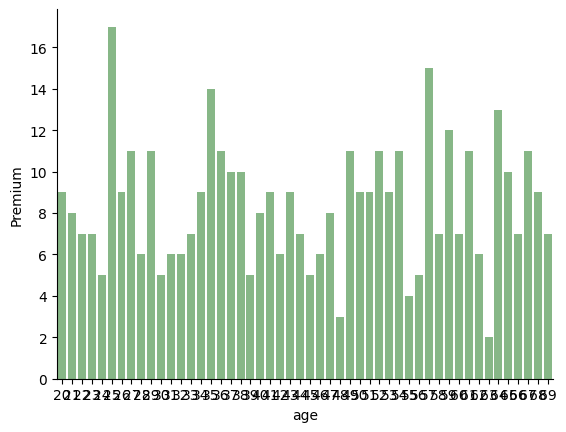

In [76]:
ax = sns.barplot(x = dataprem.age, y=dataprem.premium, data=dataprem, color='green', alpha=0.5)
ax.set(xlabel='age', ylabel='Premium')
sns.despine()  # убрать часть рамки графика
plt.show()

<ipython-input-83-11649d5df2a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.query('premium == True').age)
<ipython-input-83-11649d5df2a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.query('premium == False').age)


<Axes: xlabel='age', ylabel='Density'>

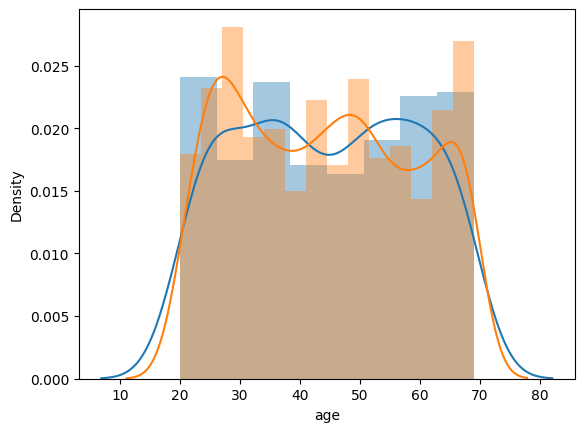

In [83]:
sns.distplot(new_data.query('premium == True').age)
sns.distplot(new_data.query('premium == False').age)

<ipython-input-88-d50eb79edf45>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.query('premium == True').age, ax =ax[0], color='red' )
<ipython-input-88-d50eb79edf45>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data.query('premium == False').age, ax = ax[1])


<Axes: xlabel='age', ylabel='Density'>

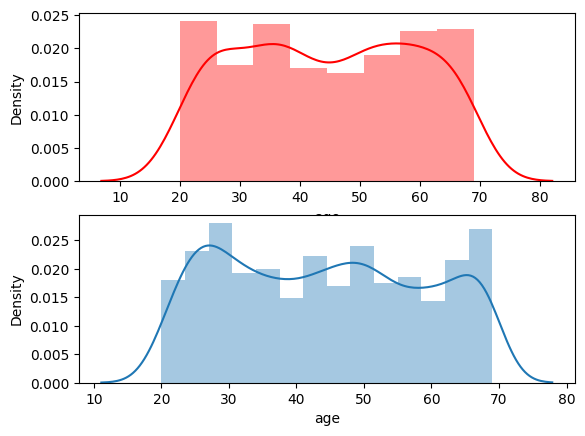

In [88]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
sns.distplot(new_data.query('premium == True').age, ax =ax[0], color='red' )
sns.distplot(new_data.query('premium == False').age, ax = ax[1])

In [92]:
comp_data = new_data.query('platform == "computer" and success == True')\
                    .groupby('age', as_index = False)\
                    .agg({'success':'count'})
comp_data

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


In [116]:
new_comp_data = new_data.query('platform == "computer" and success == True')
new_comp_data


,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


<Axes: xlabel='age', ylabel='success'>

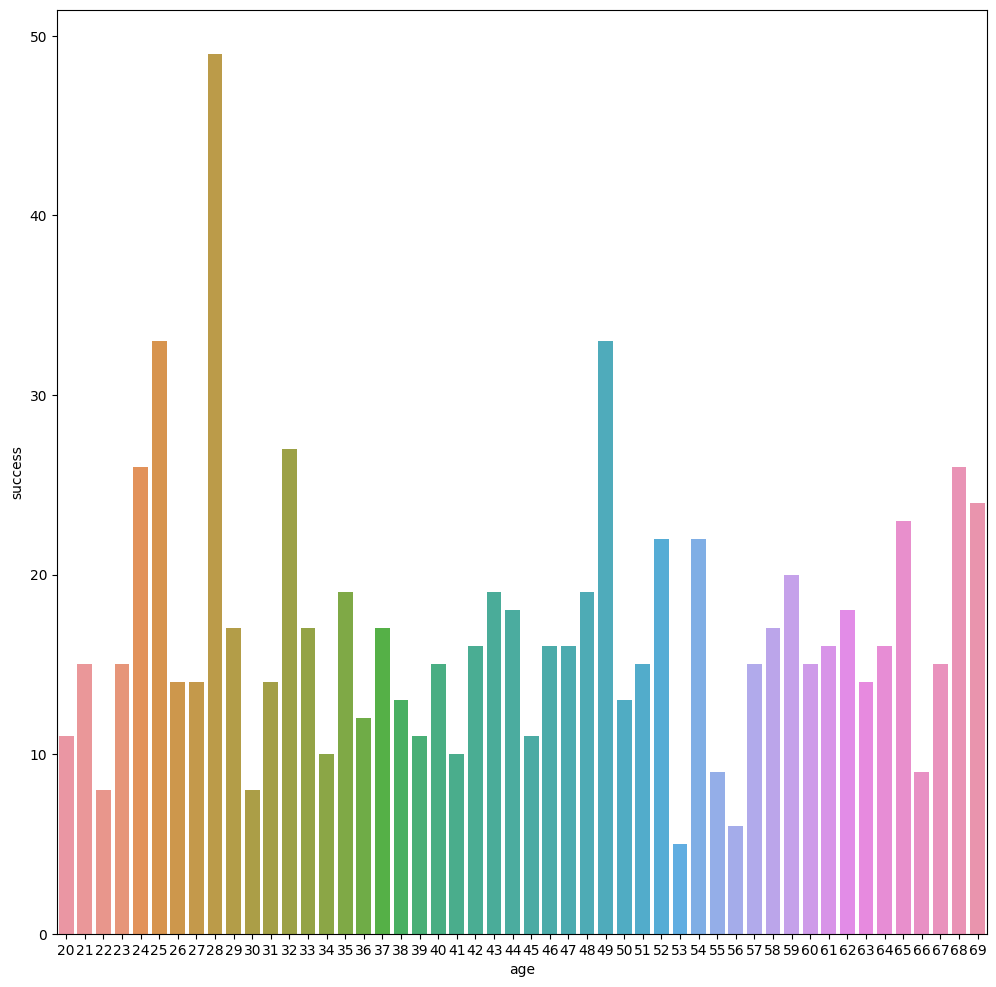

In [113]:
plt.figure(figsize = (12,12))
sns.barplot(data = comp_data, x = comp_data.age, y = comp_data.success)
